In [1]:
# Script to load and plot profiles from Hurricane Lee at three beaches on the outer Cape
# csherwood@usgs.gov

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_dir = './'
fnames = ['2023_HxLee_Nauset_PS_profile.csv',
          '2023-2021_MAR_PS_topobathy_profile.csv',
          '2023-2020_HOM_PS_topobathy_profile.csv']

# from colorbrewer
oranges = ['#ffffd4','#fee391','#fec44f','#fe9929','#d95f0e','#993404']

In [2]:
# read sensor locations
dfs=pd.read_csv(data_dir+'sensor_locations.csv',header = 0,delimiter=',')
dfs

,Site,Mooring,Site_ID,Easting (m UTM NAD83 Zone 19N),Northing (m UTM NAD83 Zone 19N),Sensor elevation (m NAVD88),Initial sand elevation (m NAVD88),Initial burial depth (m),Final sand elevation (m NAVD88),Final burial depth (m),Accretion (m)
0,Nauset,1163,33837,421067.92,4634363.28,3.53,3.85,0.32,3.97,0.44,0.12
1,Marconi,1162,33836,420124.92,4638314.86,3.76,3.98,0.22,4.18,0.42,0.20
2,HoM,1161,33835,410807.11,4656125.42,3.18,3.42,0.24,3.95,0.77,0.53


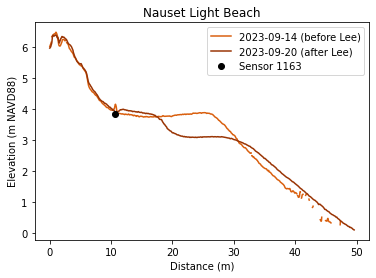

In [3]:
# Nauset Light Beach
fname = fnames[0]
df=pd.read_csv(data_dir+fname,header = 0,delimiter=',')

# mooring and id info
mooring = dfs['Mooring'][0]
siteid = dfs['Site_ID'][0]

# Calculate sensor location on profile
# start of profile
x0 = df['X'][0]
y0 = df['Y'][0]
# sensor location
xs = dfs['Easting (m UTM NAD83 Zone 19N)'][0]
ys = dfs['Northing (m UTM NAD83 Zone 19N)'][0]
dists = np.sqrt( (xs-x0)**2 + (ys-y0)**2 )
zs = dfs['Initial sand elevation (m NAVD88)'][0]

# extract data columns with convenient names
dist = df['Distance (Total)'].values
post_elev = df['Elevation (2023022FA_NLB_postHxLee_DSM_UTM19N_NAVD88_5cm_cog.tif)'].values
pre_elev = df['Elevation (2023022FA_NLB_preHxLee_DSM_UTM19N_NAVD88_5cm_cog.tif)'].values

plt.plot(dist, pre_elev, label='2023-09-14 (before Lee)', c = oranges[4])
plt.plot(dist, post_elev, label='2023-09-20 (after Lee)', c = oranges[5])
plt.plot(dists, zs, 'ok', label='Sensor '+str(mooring))
plt.ylabel('Elevation (m NAVD88)')
plt.xlabel('Distance (m)')
plt.title('Nauset Light Beach')
_ = plt.legend()
plt.savefig('Nauset_profiles.jpg', dpi=200, bbox_inches='tight')

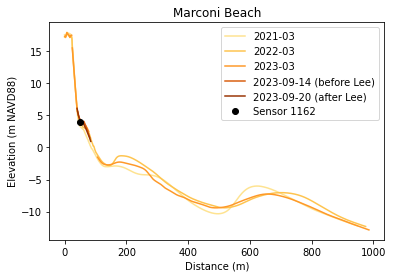

In [4]:
# Marconi Beach
fname = fnames[1]
df=pd.read_csv(data_dir+fname,header = 0,delimiter=',')

# mooring and id info
mooring = dfs['Mooring'][1]
siteid = dfs['Site_ID'][1]

# Calculate sensor location on profile
# start of profile
x0 = df['X'][1]
y0 = df['Y'][1]
# sensor location
xs = dfs['Easting (m UTM NAD83 Zone 19N)'][1]
ys = dfs['Northing (m UTM NAD83 Zone 19N)'][1]
dists = np.sqrt( (xs-x0)**2 + (ys-y0)**2 )
zs = dfs['Initial sand elevation (m NAVD88)'][1]

# extract data columns with convenient names
dist = df['Distance (Total)'].values
post_elev = df['Elevation (MAR_20230919_postHxLee_DEM.tif)'].values
pre_elev = df['Elevation (MAR_20230913_preHxLee_DEM.tif)'].values
e2021 = df['Elevation (202103FA_Marconi_topobathy_1m.tif)'].values
e2022 = df['Elevation (202203FA_Marconi_Topobathy_1m_cog.tif)'].values
e2023 = df['Elevation (202303FA_MAR_topobathy_1m.tif)'].values

plt.plot(dist, e2021, label='2021-03', c = oranges[1])
plt.plot(dist, e2022, label='2022-03', c = oranges[2])
plt.plot(dist, e2023, label='2023-03', c = oranges[3])
plt.plot(dist, pre_elev, label='2023-09-14 (before Lee)', c = oranges[4])
plt.plot(dist, post_elev, label='2023-09-20 (after Lee)', c = oranges[5])
plt.plot(dists, zs, 'ok', label='Sensor '+str(mooring))

plt.ylabel('Elevation (m NAVD88)')
plt.xlabel('Distance (m)')
plt.title('Marconi Beach')
_ = plt.legend()
plt.savefig('Marconi_profiles.jpg', dpi=200, bbox_inches='tight')

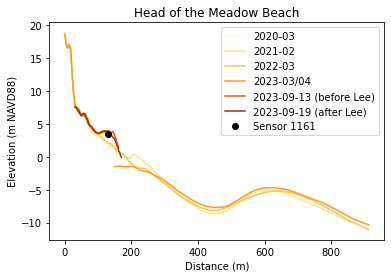

In [5]:
# Head of the Meadow Beach
fname = fnames[2]
df=pd.read_csv(data_dir+fname,header = 0,delimiter=',')

# mooring and id info
mooring = dfs['Mooring'][2]
siteid = dfs['Site_ID'][2]

# Calculate sensor location on profile
# start of profile
x0 = df['X'][2]
y0 = df['Y'][2]
# sensor location
xs = dfs['Easting (m UTM NAD83 Zone 19N)'][2]
ys = dfs['Northing (m UTM NAD83 Zone 19N)'][2]
dists = np.sqrt( (xs-x0)**2 + (ys-y0)**2 )
zs = dfs['Initial sand elevation (m NAVD88)'][2]

# extract data columns with convenient names
dist = df['Distance (Total)'].values
pre_elev = df['Elevation (HOM_20230913_preHxLee_DEM.tif)'].values
post_elev = df['Elevation (HOM_20230919_postHxLee_DEM.tif)'].values
e2020 = df['Elevation (202003FA_Truro_topobathy_1m.tif)'].values
e2021 = df['Elevation (202103FA_Truro_topobathy_1m.tif)'].values
e2022 = df['Elevation (202203FA_Truro_Topobathy_1m_cog.tif)'].values
e2023 = df['Elevation (202303FA_HOM_topobathy_1m.tif)'].values

plt.plot(dist, e2020, label='2020-03', c = oranges[0])
plt.plot(dist, e2021, label='2021-02', c = oranges[1])
plt.plot(dist, e2022, label='2022-03', c = oranges[2])
plt.plot(dist, e2023, label='2023-03/04', c = oranges[3])
plt.plot(dist, pre_elev, label='2023-09-13 (before Lee)', c = oranges[4])
plt.plot(dist, post_elev, label='2023-09-19 (after Lee)', c = oranges[5])
plt.plot(dists, zs, 'ok', label='Sensor '+str(mooring))

plt.ylabel('Elevation (m NAVD88)')
plt.xlabel('Distance (m)')
plt.title('Head of the Meadow Beach')
_ = plt.legend()
plt.savefig('HoM_profiles.jpg', dpi=200, bbox_inches='tight')